## <p style='text-align: justify;'>__Techno-economic Assessment for Process and Power Plant Design__</p>
<p style='text-align: justify;'>
A package for conducting techno-economic assessments of processes and power plants, including the estimation of capital investment, production costs, and the calculation of economic performance metrics and analyses. The methods and procedures implemented are based on <i>Chemical Engineering Design</i>, 3rd Edition (Towler & Sinnott, 2021), and <i>Analysis, Synthesis, and Design of Chemical Processes</i>, 5th Edition (Turton et al., 2018).
</p>

**By P.B. Tamarona**

### __1. Import the TEA module__

The module can be accessed in the GitHub repository: __[pbtamarona/techno-economic](https://github.com/pbtamarona/techno-economic)__

In [1]:
# # Clone the GitHub repository into a subfolder named 'techno-economic'
# !git clone https://github.com/pbtamarona/techno-economic
# !cp techno-economic/*.py .

In [2]:
from tea import *

### __2. Create the `Equipment` objects__

<p style='text-align: justify;'>The second step is to create objects that represent each component in your process plant using the <code>Equipment</code>. These objects capture key characteristics such as name, process type, material, and specific parameters like power or pressure. Below are some examples:</p>

In [3]:
# Creating objects for the process equipment
comp = Equipment(
    name='Comp-1', 
    process_type='Fluids', 
    material='Carbon steel', 
    param=150, # kW
    type='Compressor', 
    subtype='Centrifugal'
)

motor_comp = Equipment(
    name='Motor-1', 
    process_type='Electrical', 
    material='Carbon steel', 
    param=150/0.9,  # Adjusted for efficiency
    type='Motor/generator', 
    subtype='Totally enclosed'
)

heatX = Equipment(
    name='HeatX-1', 
    process_type='Fluids', 
    material='316 stainless steel', 
    param=50, # m2
    type='Heat exchanger', 
    subtype='U-tube shell & tube'
)

cooler = Equipment(
    name='Cooler-1', 
    process_type='Fluids', 
    material='Carbon steel', 
    param=60, # m2
    type='Heat exchanger', 
    subtype='U-tube shell & tube'
)

psa = Equipment(
    name='PSA', 
    process_type='Fluids', 
    material='Carbon steel', 
    param=800, # kmol/h
    type='PSA'
)

reactor = Equipment(
    name='Reactor', 
    process_type='Mixed', 
    material='316 stainless steel', 
    param=300, # m3
    type='Reactor', 
    subtype='Fluidized Bed'
)


Here are the accepted inputs for Equipment Class:

<p style="text-align: justify;">
The <code>Equipment</code> class supports a range of <b>process types</b>, <b>materials</b>, <b>equipment types</b>, and <b>subtypes</b>, each associated with specific costing correlations. The main parameter (<code>param</code>) should be in appropriate units depending on the equipment type (e.g., kW for motors, kW for compressors, m² for heat exchangers, etc.).
</p>

---

#### 🏭 **Process Types**

`process type` represent the nature of the equipment's role in the process and are used to determine installation and design factors:

- Solids
- Fluids
- Mixed
- Electrical

---

#### 🔩 **Material Options**

`material` affect the cost multiplier based on fabrication and corrosion resistance:

- Carbon steel
- Aluminum
- Bronze
- Cast steel
- 304 stainless steel
- 316 stainless steel
- 321 stainless steel
- Hastelloy C
- Monel
- Nickel
- Inconel

---

#### ⚙️ **Equipment Types and Subtypes**

Each `type` may include specific `subtype` options that map to different costing correlations.
<center>

| Type               | Subtype(s)                                                                 |
|--------------------|----------------------------------------------------------------------------|
| **Blower**         | *(no subtype)*                                                             |
| **Compressor**     | Centrifugal, Reciprocating                                                 |
| **Cyclone**        | *(no subtype)*                                                             |
| **Heat exchanger** | U-tube shell & tube, Floating head shell & tube, Double pipe, Thermosiphon reboiler, U-tube kettle reboiler, Plate & frame, and 2-to-4 Streams Plate-fin |
| **Furnace/heater** | Cylindrical furnace, Box furnace, Pyrolysis furnace, Electric furnace      |
| **Motor/generator**| Explosion proof, Totally enclosed                                          |
| **PSA**            | *(no subtype)*                                                             |
| **Pump**           | *(no subtype)*                                                             |
| **Reactor**        | Fluidized Bed, Vertical CS Vessel, Horizontal CS Vessel, Vertical 304SS Vessel, Horizontal 304SS Vessel |
| **Turbine**        | Condensing steam, Axial gas, Radial expander                               |
</center>

---

#### 📐 **Parameter (`param`) Units**

The unit for the `param` argument depends on the cost correlations used for each type of equipment:
<center>

| Equipment Type      | Sub-type                     | Source           | Parameter Meaning         | Example Unit      | Valid Value Range        |
|---------------------|------------------------------|------------------|---------------------------|-------------------|--------------------------|
| Blower              | Blower                       | Towler, 2010     | Volumetric flow rate      | m³/h              | 200 - 5000               |
| Compressor          | Centrifugal                  | Towler, 2010     | Driver power              | kW                | 75 - 30,000              |
|                     | Reciprocating                | Towler, 2010     | Driver power              | kW                | 93 - 16,800              |
| Cyclone             | Gas Multi-cyclone            | Ulrich, 2003     | Volumetric flow rate      | m³/h              | 0.1 - 45                 |
| Heat exchanger      | U-tube shell & tube          | Towler, 2010     | Heat exchanger area       | m²                | 10 - 1000                |
|                     | Floating head shell & tube   | Towler, 2010     | Heat exchanger area       | m²                | 10 - 1000                |
|                     | Double pipe                  | Towler, 2010     | Heat exchanger area       | m²                | 1 - 80                   |
|                     | Thermosiphon reboiler        | Towler, 2010     | Heat exchanger area       | m²                | 10 - 500                 |
|                     | U-tube kettle reboiler       | Towler, 2010     | Heat exchanger area       | m²                | 10 - 500                 |
|                     | Plate & frame                | Towler, 2010     | Heat exchanger area       | m²                | 1 - 500                  |
|                     | Plate & fin (2-4 streams)    | ESDU, 1997       | Exchanger core volume     | m³                | 0.01 - 10                 |
| Furnace/heater      | Cylindrical furnace          | Towler, 2010     | Heating duty              | MW                | 0.2 - 60                 |
|                     | Box furnace                  | Towler, 2010     | Heating duty              | MW                | 30 - 120                 |
|                     | Pyrolysis furnace            | Ulrich, 2003     | Heating duty              | kW                | 3000 - 60,000            |
|                     | Electric furnace (Arc)       | Parkinson, 2016  | Electric power            | MWe               | N/A                      |
| Motor/generator     | Explosion proof              | Ulrich, 2003     | Shaft power               | kW                | 2.8 - 5000               |
|                     | Totally enclosed             | Ulrich, 2003     | Shaft power               | kW                | 0.2 - 9000               |
| PSA                 | PSA                          | Towler, 1994     | Mole feed rate            | kmol/h            | N/A                      |
| Pump                | Single-stage centrifugal pump| Towler, 2010     | Volumetric flow rate      | L/s               | 0.2 - 126                |
| Reactor             | Fluidized Bed                | Ulrich, 2003     | Reactor volume            | m³                | 0.3 - 2400               |
|                     | Vertical CS Vessel           | Towler, 2010     | Shell mass                | kg                | 160 - 250,000            |
|                     | Horizontal CS Vessel         | Towler, 2010     | Shell mass                | kg                | 160 - 50,000             |
|                     | Vertical 304SS Vessel        | Towler, 2010     | Shell mass                | kg                | 120 - 250,000            |
|                     | Horizontal 304SS Vessel      | Towler, 2010     | Shell mass                | kg                | 120 - 50,000             |
| Turbine             | Condensing steam             | Towler, 2010     | Turbine power             | kW                | 100 - 20,000             |
|                     | Axial gas                    | Ulrich, 2003     | Turbine power             | kW                | 10 - 10,000              |
|                     | Radial expander              | Ulrich, 2003     | Turbine power             | kW                | 2.5 - 1500               |
</center>

##### 📝 Some notes

<p style="text-align: justify;">Ensure that the value passed to <code>param</code> is consistent with the cost correlation being applied. The value of <code>param</code> cannot be less than the valid range. However, if it is larger than the valid range, the class will consider an additional number of parallel units.</p>

### __3. Check `Equipment` attributes__

<p style="text-align: justify;">Once you have created the objects for your process plant equipment, you can check their attributes such as estimated purchase and direct costs of each component as follows:</p>

In [4]:
print(f'Component name: {comp.name}')
print(f'Number of parallel units: {comp.num_units}')
print(f"Purchase cost of the compressor: ${comp.purchased_cost:,.2f}")
print(f"Direct cost of the compressor: ${comp.direct_cost:,.2f}")

Component name: Comp-1
Number of parallel units: 1
Purchase cost of the compressor: $1,431,033.56
Direct cost of the compressor: $4,579,307.38


Here, the direct costs refer to those incurred during the construction of a plant, in addition to the purchased (delivered) cost of equipment, such as:
1. Equipment erection, including foundations and minor structural work
2. Piping, including insulation and painting
3. Electrical, power, and lighting
4. Instruments and automatic process control (APC) systems
5. Process buildings and structures
6. Ancillary buildings, offices, laboratory buildings, and workshops (if not costed separately as offsites)
7. Storage for raw materials and finished product (if not costed separately as offsites)
8. Utilities and provision of plant for steam, water, air, and firefighting services (if not costed separately as offsites)
9. Site preparation

### __3. Creating the `ProcessPlant` object__

<p style="text-align: justify;">To begin using the <code>ProcessPlant</code> class, the user must provide a configuration dictionary with at least a plant name, process type (<code>Solids</code>, <code>Fluids</code>, or <code>Mixed</code>), country/region for location factors, and a list of equipment objects (each with a defined direct cost). Here is an example using the <code>Equipment</code> objects that we have made:</p>

In [5]:
config = {'plant_name': 'My_Plant',
          'process_type': 'Mixed', # Let's assume that there are fluids and solids in our process
          'country': 'Netherlands', 'region': None, # Here we take Netherlands as an example
          # List all the process equipment objects that have been created below
          'equipment': [
              comp,
              motor_comp,
              heatX,
              cooler,
              psa,
              reactor
            ]
}

MyPlant = ProcessPlant(config)

<p style="text-align: justify;">From these inputs, the class can calculate the Inside Battery Limits (ISBL) cost, then derives Outside Battery Limits (OSBL), design/engineering, contingency, and finally the fixed capital investment.</p>

### __3. Fixed Capital Investment__

The total fixed capital investment (FCI) of the plant consists of:
- Inside Battery Limits (ISBL)  
- Outside Battery Limits (OSBL)  
- Design and engineering costs (D&E)
- Contingency

Estimated using the following equation:
$$
\text{FCI} = \text{ISBL} \cdot (1 + OS) \cdot (1 + D\&E + X) \cdot LF
$$
<p style="text-align: justify;">Where, ISBL is the total of equipment direct costs and the other are factors are determined based on the user inputs in the plant configuration: <code>process_type</code>, <code>country</code>, and <code>region</code>.</p>

- **Process type**: Determines the nature of the plant's operation and influences cost estimation factors. The available types are:  
    - `Solids`: OS = 0.4, D\&E = 0.2, X = 0.1  
    - `Fluids`: OS = 0.3, D\&E = 0.3, X = 0.1  
    - `Mixed`: OS = 0.4, D\&E = 0.25, X = 0.1  

- **Country & region**: Determines the location factor (_LF_), which adjusts the estimated capital cost to reflect local economic conditions and construction costs. Available countries and regions are:  

    - **United States**
        - Gulf Coast: 1.00  
        - East Coast: 1.04  
        - West Coast: 1.07  
        - Midwest: 1.02  
    - **Canada** 
        - Ontario: 1.00  
        - Fort McMurray: 1.60  
    - **Mexico**: 1.03  
    - **Brazil**: 1.14  
    - **China**  
        - Imported: 1.12  
        - Indigenous: 0.61  
    - **Japan**: 1.26  
    - **Southeast Asia**: 1.12  
    - **Australia**: 1.21  
    - **India**: 1.02  
    - **Middle East**: 1.07  
    - **France**: 1.13  
    - **Germany**: 1.11  
    - **Italy**: 1.14  
    - **Netherlands**: 1.19  
    - **Russia**: 1.53  
    - **United Kingdom**: 1.02  

*Note: These factors are based on _Chemical Engineering Design_, 3rd Edition (Towler & Sinnott, 2021).*

<p style="text-align: justify;">Now, using the <code>ProcessPlant</code> that we have created, we can use the function <code>calculate_fixed_capital</code> to calculate the ISBL, OSBL, D&E, contigency and FCI, as follows:</p>

In [6]:
MyPlant.calculate_fixed_capital(print_results=True) # Use print results to display the capital cost estimation

Capital cost estimation
ISBL: $11,087,471.91
OSBL: $4,434,988.76
Design and engineering: $3,880,615.17
Contingency: $1,552,246.07
Fixed capital investment: $20,955,321.91


If you need only the ISBL, you can just perform `calculate_isbl`:

In [7]:
MyPlant.calculate_isbl(print_results=True)

ISBL cost estimation: $11,087,471.91


To retrieve the values of cost estimates for each component of capital cost, you can simply access the corresponding attributes:

In [8]:
print(f"OSBL: ${MyPlant.osbl:,.2f}")
print(f'Design and Engineering: ${MyPlant.dne:,.2f}')
#  ... and so on

OSBL: $4,434,988.76
Design and Engineering: $3,880,615.17


### __4. Variable Production Costs__

Variable costs of production are costs that are proportional to the plant output or operation rate. These can include the cost of:
- Electricity
- Water (cooling, etc.)
- Natural Gas
- Chemicals
- Other utilities or consumables defined in the configuration

<p style="text-align: justify;">In the <code>ProcessPlant</code> object, variable production costs are calculated using the <code>calculate_variable_opex</code> function. These costs are based on the <strong>daily consumption</strong> and <strong>unit price</strong> of each resource. The cost items must be provided by the user through a configuration dictionary and updated to the <code>ProcessPlant</code>. Each cost item should itself be a dictionary with the following keys:</p>

- `consumption`: Annual consumption of the resource  
- `price`: Unit price in USD  

Optional items for uncertainty analysis (can be ignored for now):  
- `price_std` *(optional)*: Standard deviation of the price  
- `price_max` *(optional)*: Maximum price of the resource  
- `price_min` *(optional)*: Minimum price of the resource

Below is an example of some variable costs inputs and how to pass them to the `ProcessPlant` object.

In [9]:
config = {
    'variable_opex_inputs': {
        'electricity': {
            'consumption': 1_000_000,      # Daily consumption in kWh
            'price': 0.10,                 # Unit price in USD/kWh
            'price_std': 0.025 / 2,        # Std. deviation for uncertainty analysis
            'price_max': 3,                # Max expected price
            'price_min': 0.01              # Min expected price
        },
        'water': {
            'consumption': 10_000,         # Daily consumption in m³
            'price': 0.3,                  # Unit price in USD/m³
            'price_std': 0.05,             # Std. deviation for uncertainty analysis
            'price_max': 0.6,              # Max expected price
            'price_min': 0.01              # Min expected price
        },
        'natural_gas': {
            'consumption': 3000,           # Daily consumption in MMBtu
            'price': 3.5,                  # Unit price in USD/MMBtu
            'price_std': 0.5,              # Std. deviation for uncertainty analysis
            'price_max': 5.0,              # Max expected price
            'price_min': 0                 # Min expected price
        },
        'chemicals': {
            'consumption': 1500,           # Daily consumption in tonnes
            'price': 40,                   # Unit price in USD/tonne
            'price_std': 10,               # Std. deviation for uncertainty analysis
            'price_max': 80,               # Max expected price
            'price_min': 5                 # Min expected price
        },
        # Add more variable OPEX items as needed
    }
}

MyPlant.update_configuration(config)       # Update the ProcessPlant with variable OPEX configuration


Now we can use the `calculate_variable_opex` function:

In [10]:
MyPlant.calculate_variable_opex(print_results=True)  # Calculate variable OPEX costs

Variable production costs estimation
  - Electricity: $36,500,000.00 per year
  - Water: $1,095,000.00 per year
  - Natural gas: $3,832,500.00 per year
  - Chemicals: $21,900,000.00 per year
Total Variable OPEX: $63,327,500.00 per year


To retrieve the values for each variable operating cost components, you can do:

In [11]:
print(f'Design and Engineering: ${MyPlant.variable_opex_breakdown['electricity']:,.0f} per year')  # Retrieve the breakdown of variable costs for electricity
print(f'Natural Gas: ${MyPlant.variable_opex_breakdown['natural_gas']:,.0f} per year')  # Retrieve the breakdown of variable costs for natural gas

Design and Engineering: $36,500,000 per year
Natural Gas: $3,832,500 per year


### __5. Fixed Production Costs__

Fixed production costs are those costs that do not vary with the rate of production, these include:
- Maintenance
- Taxes and insurance
- Operating labor
- Supervision and overhead
- et cetera.

<p style="text-align: justify;">Fixed production costs are calculated using the <code>calculate_fixed_opex</code> function of the <code>ProcessPlant</code> object. Most cost components are derived from multiplication factors reported in <i>Analysis, Synthesis, and Design of Chemical Processes</i>, 5th Edition (Turton et al., 2018). These factors are applied to estimate fixed cost components based on the plant’s fixed capital investment, working capital, variable production costs, interest rate, and operator hourly rate. Thus, here, we first need to pass our working capital, interest rate and operator hourly rate assumptions to out <code>ProcessPlant</code> object:</p>

In [12]:
config = {
    'working_capital': 0.15*MyPlant.fixed_capital,  # Common assumption for working capital: 15% of the fixed capital
    'interest_rate': 0.09,  # The annual interest rate used for financing, here set at 9%.
    'operator_hourly_rate': 38.11  # The hourly rate of 1 process plant operator (in US$/hour)
}

MyPlant.update_configuration(config)       # Update the ProcessPlant with working capital, interest rate and operator hourly rate

Now we can use the `calculate_fixed_opex` function:

In [13]:
MyPlant.calculate_fixed_opex(print_results=True)  # Calculate fixed OPEX costs

Fixed production costs estimation
Operating labor costs: $2,091,476.80 per year
Supervision costs: $522,869.20 per year
Direct salary overhead: $1,307,173.00 per year
Laboratory charges: $209,147.68 per year
Maintenance costs: $554,373.60 per year
Taxes and insurance costs: $166,312.08 per year
Rent of land costs: $232,836.91 per year
Environmental charges: $155,224.61 per year
Operating supplies: $99,787.25 per year
General plant overhead: $2,548,987.35 per year
Interest on working capital: $282,896.85 per year
Patents and royalties: $1,537,603.99 per year
Distribution and selling costs: $1,537,603.99 per year
R&D costs: $2,306,405.98 per year
Fixed OPEX: $13,552,699.26 per year


To retrieve the values for each fixed operating cost components, you can do:

In [14]:
print(f'Operating labor costs: ${MyPlant.operating_labor_costs:,.2f}')
print(f'Supervision costs: ${MyPlant.supervision_costs:,.2f}')
print(f'Maintenance costs: ${MyPlant.maintenance_costs:,.2f}')
# ..... and so on

Operating labor costs: $2,091,476.80
Supervision costs: $522,869.20
Maintenance costs: $554,373.60


### __6. Calculating Economic Performance Metrics__

<p style="text-align: justify;">Once we have the total CAPEX (i.e., Fixed Capital Investment or FCI) and OPEX (i.e., variable and fixed operating costs), we can calculate the key economic performance metrics. This code covers the following metrics:</p>

- __Net-present value (NPV)__

    $
    \displaystyle NPV = \sum_{t=1}^{t_p} \frac{CF_t}{(1 + i)^t}
    $  
    where:  
    - $CF_t$ = plant net cash flow in year $t$
    - $i$ = fixed interest rate  
    - $t_p$ = project lifetime  

- __Internal rate of return (IRR)__

    $
    \displaystyle 0 = \sum_{t=1}^{t_p} \frac{CF_t}{(1 + IRR)^{t}}
    $

    IRR is the discount rate \(r\) such that NPV = 0

- __Payback time (PBT)__

    $
    \displaystyle \mathrm{PBT} = \frac{\mathrm{FCI}}{\overline{CF}}
    $  
    where:  
    - $\mathrm{FCI}$ = fixed capital investment  
    - $\overline{CF}$ = average annual cash flow  
- __Return of investment (ROI)__

    $
    \displaystyle ROI = \frac{\sum_{t=1}^{t_p} \text{Net Profit}_t}{t_p \cdot \sum \text{Total Investment}}
    $ 

    where:  
    - $\text{Net Profit}_t$ = plant net profit in year $t$  
    - $\text{Total Investment}$ = invested capital = FCI + working capital

- __Levelized cost (LC)__

    There have been many type of levelized cost equations in the literature. In this code we opt to choose this version:
    
    $
    \displaystyle LC = \frac{\sum_{t=1}^{t_p} \frac{CapEx_t + OpEx_t}{(1 + i)^{t}}}{\sum_{t=1}^{t_p} \frac{Q_t}{(1 + i)^{t}}}
    $  

    where:  
    - $CapEx_t$ = capital expenditure in year $t$  
    - $OpEx_t$ = operating expenditure (cash cost) in year $t$  
    - $Q_t$ = production output in year $t$  
    - $i$ = discount rate  
    - $t_p$ = project lifetime 

<p style="text-align: justify;">
The first step in calculating the financial metrics is to generate the cash flow profile of the process plant over its lifetime. To do this, the following inputs are required for the <code>ProcessPlant</code> object:
</p>

- Project lifetime (in years, minimum of 3 years)
- Daily production of the product (e.g. MWh/day of electricity, kg/day of H2)
- Price of product in US$/unit (ensure that the unit matches the one used for annual production)
- Income tax rate

In [15]:
config = {
    'project_lifetime': 20,  # in years
    'daily_prod': 100_000,  # in unit per day
    'product_price': 5,  # in currency per unit
    'tax_rate': 0.2,  # assuming 20% tax rate
}

MyPlant.update_configuration(config)       # Update the ProcessPlant with economic performance metrics configuration

To create the process plant cash flow table, we use the function `create_cash_flow_table` as follows:

In [16]:
MyPlant.calculate_cash_flow(print_results=True)

,Year,Capital cost,Production [unit],Revenue,Cash cost of prod.,Gross profit,Depreciation,Taxable income,Tax paid,Cash flow,PV of cash flow,NPV
0,1,"$6,286,596.57",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$-6,286,596.57","$-5,767,519.79","$-5,767,519.79"
1,2,"$12,573,193.15",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$-12,573,193.15","$-10,582,605.12","$-16,350,124.92"
2,3,"$5,238,830.48","$14,600,000.00","$73,000,000.00","$38,883,699.26","$34,116,300.74","$2,095,532.19","$32,020,768.55",$0.00,"$28,877,470.26","$22,298,705.48","$5,948,580.56"
3,4,$0.00,"$29,200,000.00","$146,000,000.00","$64,214,699.26","$81,785,300.74","$2,095,532.19","$79,689,768.55","$6,404,153.71","$75,381,147.03","$53,401,904.99","$59,350,485.56"
4,5,$0.00,"$36,500,000.00","$182,500,000.00","$76,880,199.26","$105,619,800.74","$2,095,532.19","$103,524,268.55","$15,937,953.71","$89,681,847.03","$58,287,047.16","$117,637,532.72"
5,6,$0.00,"$36,500,000.00","$182,500,000.00","$76,880,199.26","$105,619,800.74","$2,095,532.19","$103,524,268.55","$20,704,853.71","$84,914,947.03","$50,632,008.48","$168,269,541.20"
6,7,$0.00,"$36,500,000.00","$182,500,000.00","$76,880,199.26","$105,619,800.74","$2,095,532.19","$103,524,268.55","$20,704,853.71","$84,914,947.03","$46,451,383.92","$214,720,925.12"
7,8,$0.00,"$36,500,000.00","$182,500,000.00","$76,880,199.26","$105,619,800.74","$2,095,532.19","$103,524,268.55","$20,704,853.71","$84,914,947.03","$42,615,948.55","$257,336,873.68"
8,9,$0.00,"$36,500,000.00","$182,500,000.00","$76,880,199.26","$105,619,800.74","$2,095,532.19","$103,524,268.55","$20,704,853.71","$84,914,947.03","$39,097,200.51","$296,434,074.19"
9,10,$0.00,"$36,500,000.00","$182,500,000.00","$76,880,199.26","$105,619,800.74","$2,095,532.19","$103,524,268.55","$20,704,853.71","$84,914,947.03","$35,868,991.29","$332,303,065.48"


<p style="text-align: justify;">Tha annual variation in the cash flow is calculated based on the typical start-up schedule of a chemical plant, as described in _Chemical Engineering Design_, 3rd Edition (Towler & Sinnott, 2021). Below is the start-up schedule adapted for the cash flow calculation in this code:</p>

<center>

| **Year**  | **Costs**                                                                 | **Revenues**              | **Explanation**                             |
|-----------|---------------------------------------------------------------------------|---------------------------|---------------------------------------------|
| 1st       | 30% of FCI                                                                | 0                         | Engineering and long lead-time items        |
| 2nd       | 60% of FCI                                                                | 0                         | Procurement and construction                |
| 3rd       | 10% of FCI + working capital + fixed production costs + 40% of variable production costs | 40% of design revenue    | Remaining construction and initial production |
| 4th       | Fixed production costs + 80% of variable production costs                 | 80% of design revenue     | Shake-down of plant                         |
| 5th+++    | Fixed + variable production costs                                         | 100% of design revenue    | Full production at design rates             |

</center>

---
As you may have noticed in the cash flow table, the __NPVs__ for each year of the project lifetime are calculated in the last column.

Now, based on this cash flow, we can calculate the remaining economic performance metrics as follows:

In [17]:
MyPlant.calculate_irr(print_results=True)
MyPlant.calculate_payback_time(print_results=True)
MyPlant.calculate_roi(print_results=True)
MyPlant.calculate_levelized_cost(print_results=True)

Internal Rate of Return: 164.94%
Payback time: 0.26 years
Return of investment: 304.99%
Levelized cost: $2.220/kg


### **7. Sensitivity Analyses**

<p style="text-align: justify;">In TEA, sensitivity analysis is crucial to evaluate how uncertainties in input parameters affect the overall results. Cost estimates, operating parameters, and economic assumptions often involve inherent variability. By conducting sensitivity analyses, we can identify which variables have the most significant impact on the final economic metric—in this case, the LC—and assess how the plant performs under economic uncertainty.</p>

This section presents two types of sensitivity analyses:

- **Tornado plot analysis**  
  <p style="text-align: justify;">A deterministic one-at-a-time (OAT) sensitivity analysis. Each selected input parameter is varied by a fixed percentage (e.g., ±50%) while keeping others constant. The resulting change in LC of product is visualized in a tornado plot, which highlights the most influential parameters by bar length.</p>

- **Monte Carlo analysis**  
  <p style="text-align: justify;">A probabilistic method that considers simultaneous variations of all uncertain input parameters. Each parameter is defined by a probability distribution (e.g., truncated normal), and a large number of simulations (e.g., 1,000,000) are conducted to generate a distribution of LCOP outcomes. This method provides a way to assess economic performance under simultaneous uncertainty in all key inputs.</p>

#### __Tornado plot analysis__
The following functions are used to generate the tornado plot of a `ProcessPlant` object with ±50% variation:

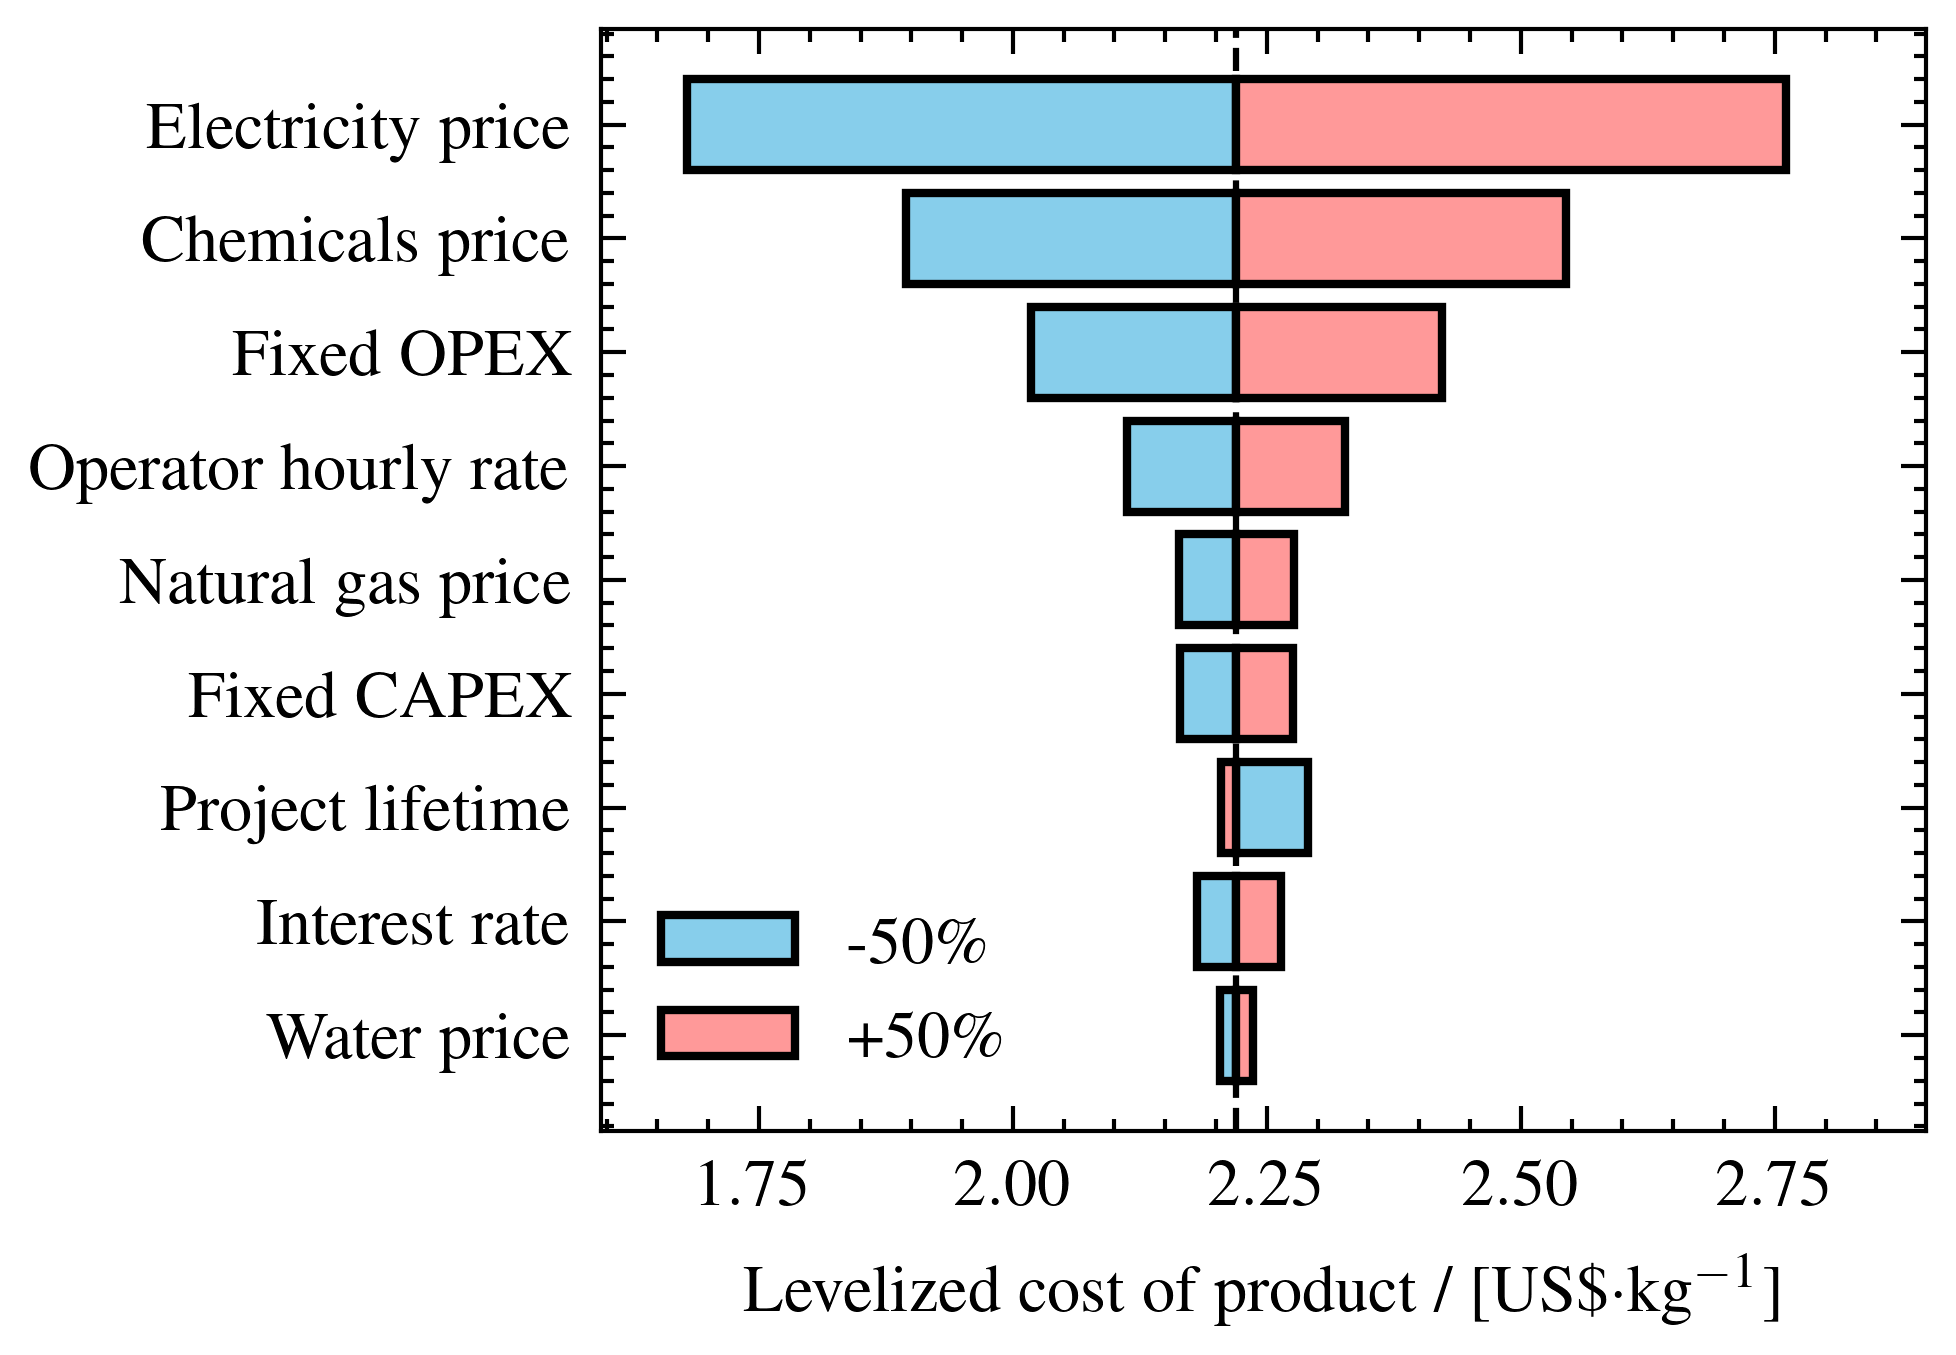

In [18]:
tornado_plot(MyPlant, plus_minus_value=0.5)

<p style="text-align: justify;">
The tornado plot shows that electricity price, chemical prices, and fixed OPEX are the most influential factors affecting LC of product, followed by operator hourly rate and natural gas price. In contrast, variables such as water price, interest rate, and project lifetime have relatively minor impacts. This indicates that the economics of the process are OPEX-dominated; therefore, the focus should be on improving production efficiency rather than reducing equipment costs. This visualization helps prioritize which parameters require more accurate estimation or tighter control to reduce economic uncertainty.
</p>

#### __Monte Carlo analysis__
The `monte_carlo()` function performs the Monte Carlo analysis based on uncertain input parameters. It includes the following arguments:

- **`process_plant`** : the `ProcessPlant` object
- **`num_samples`** *(default: 1,000,000)*: Total number of samples drawn for the simulation. A higher value increases accuracy but requires more computation time.
- **`batch_size`** *(default: 1,000)*: Number of samples processed in each batch to manage memory usage efficiently.
- **`show_input_distributions`** *(True/False)*: If `True`, displays histograms of sampled input distributions to visualize uncertainty in each variable.

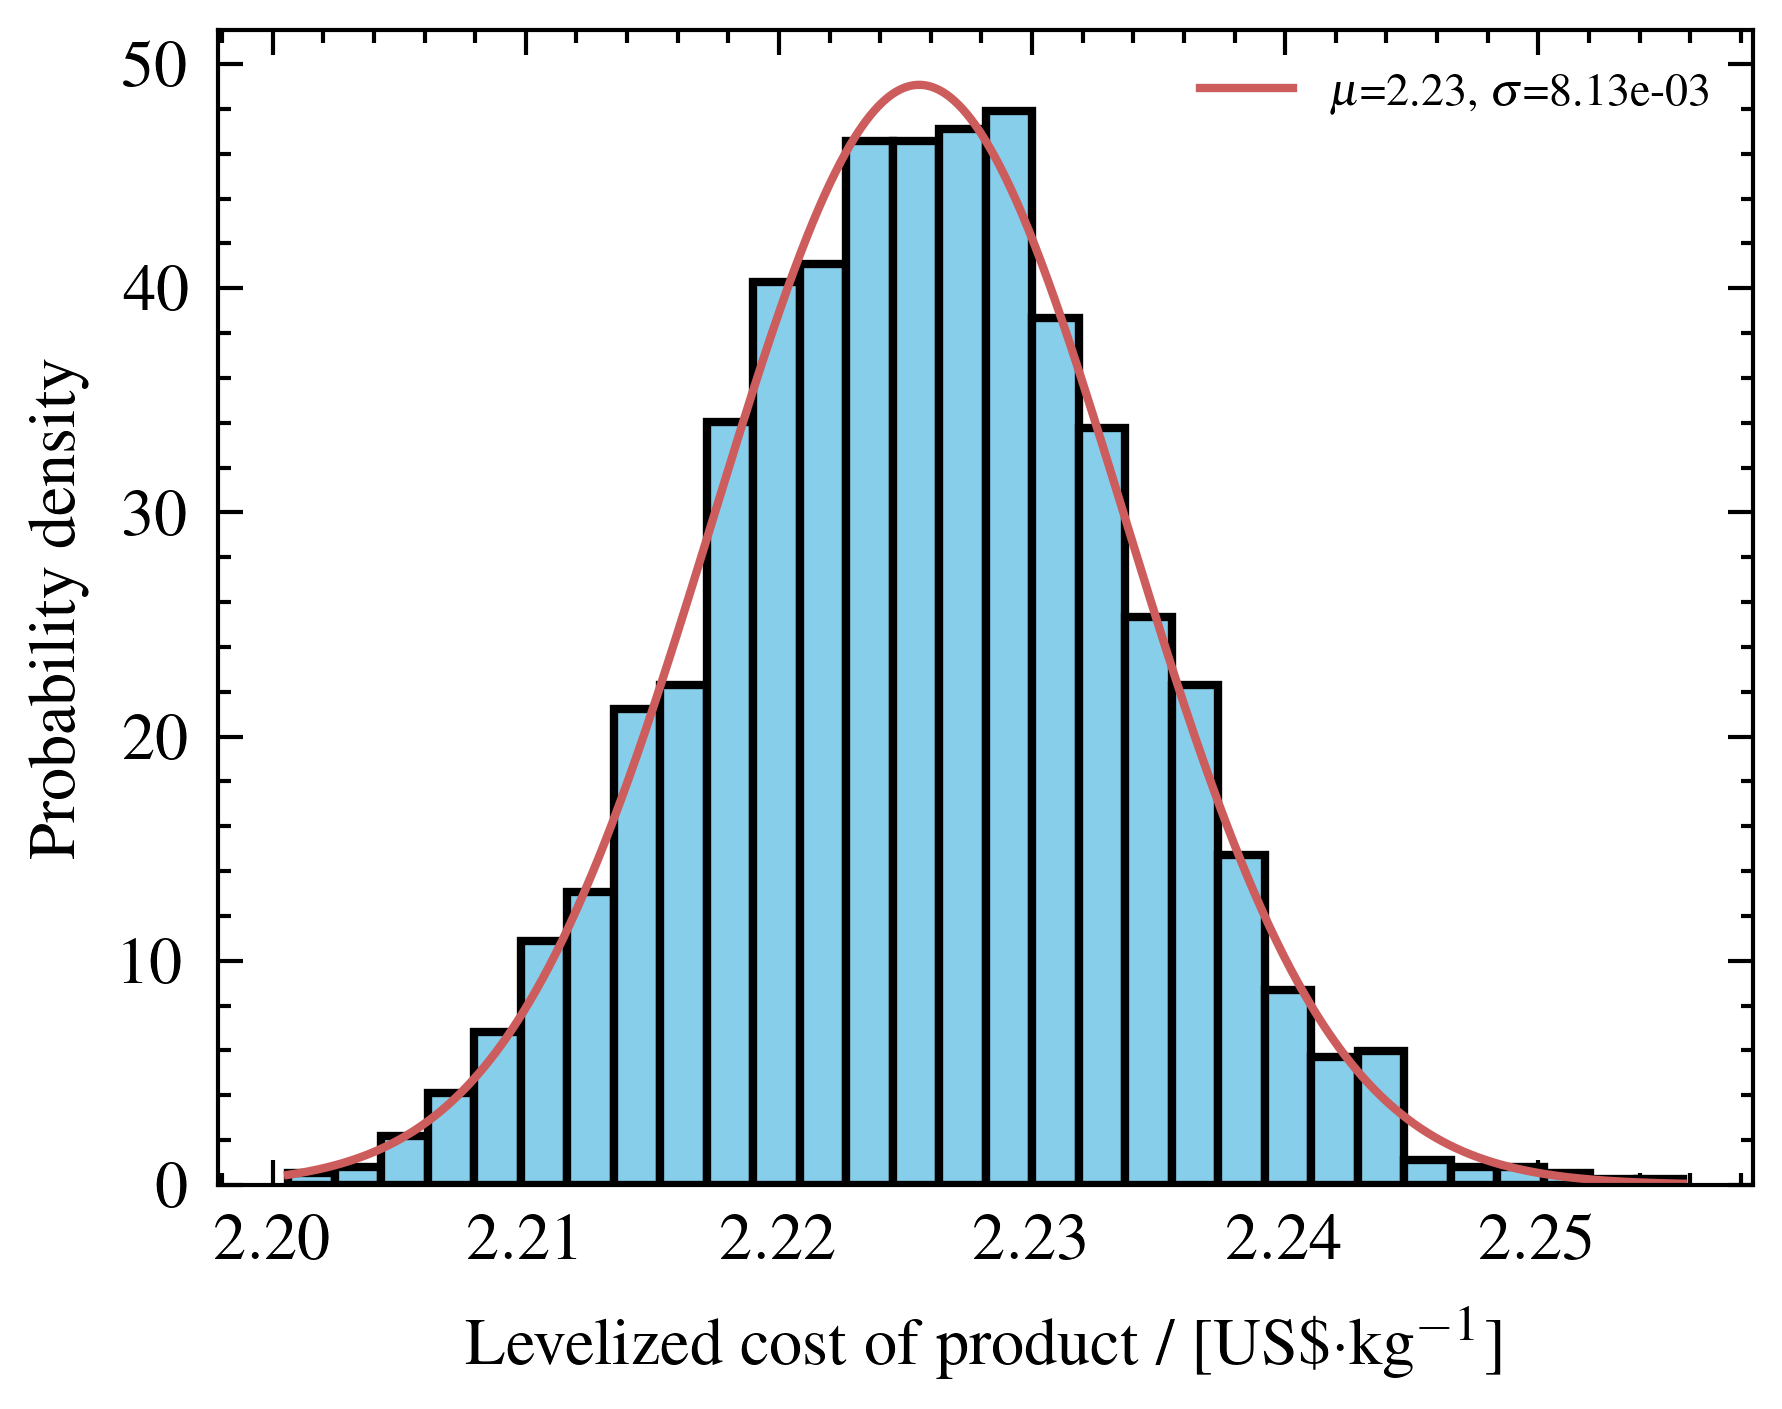

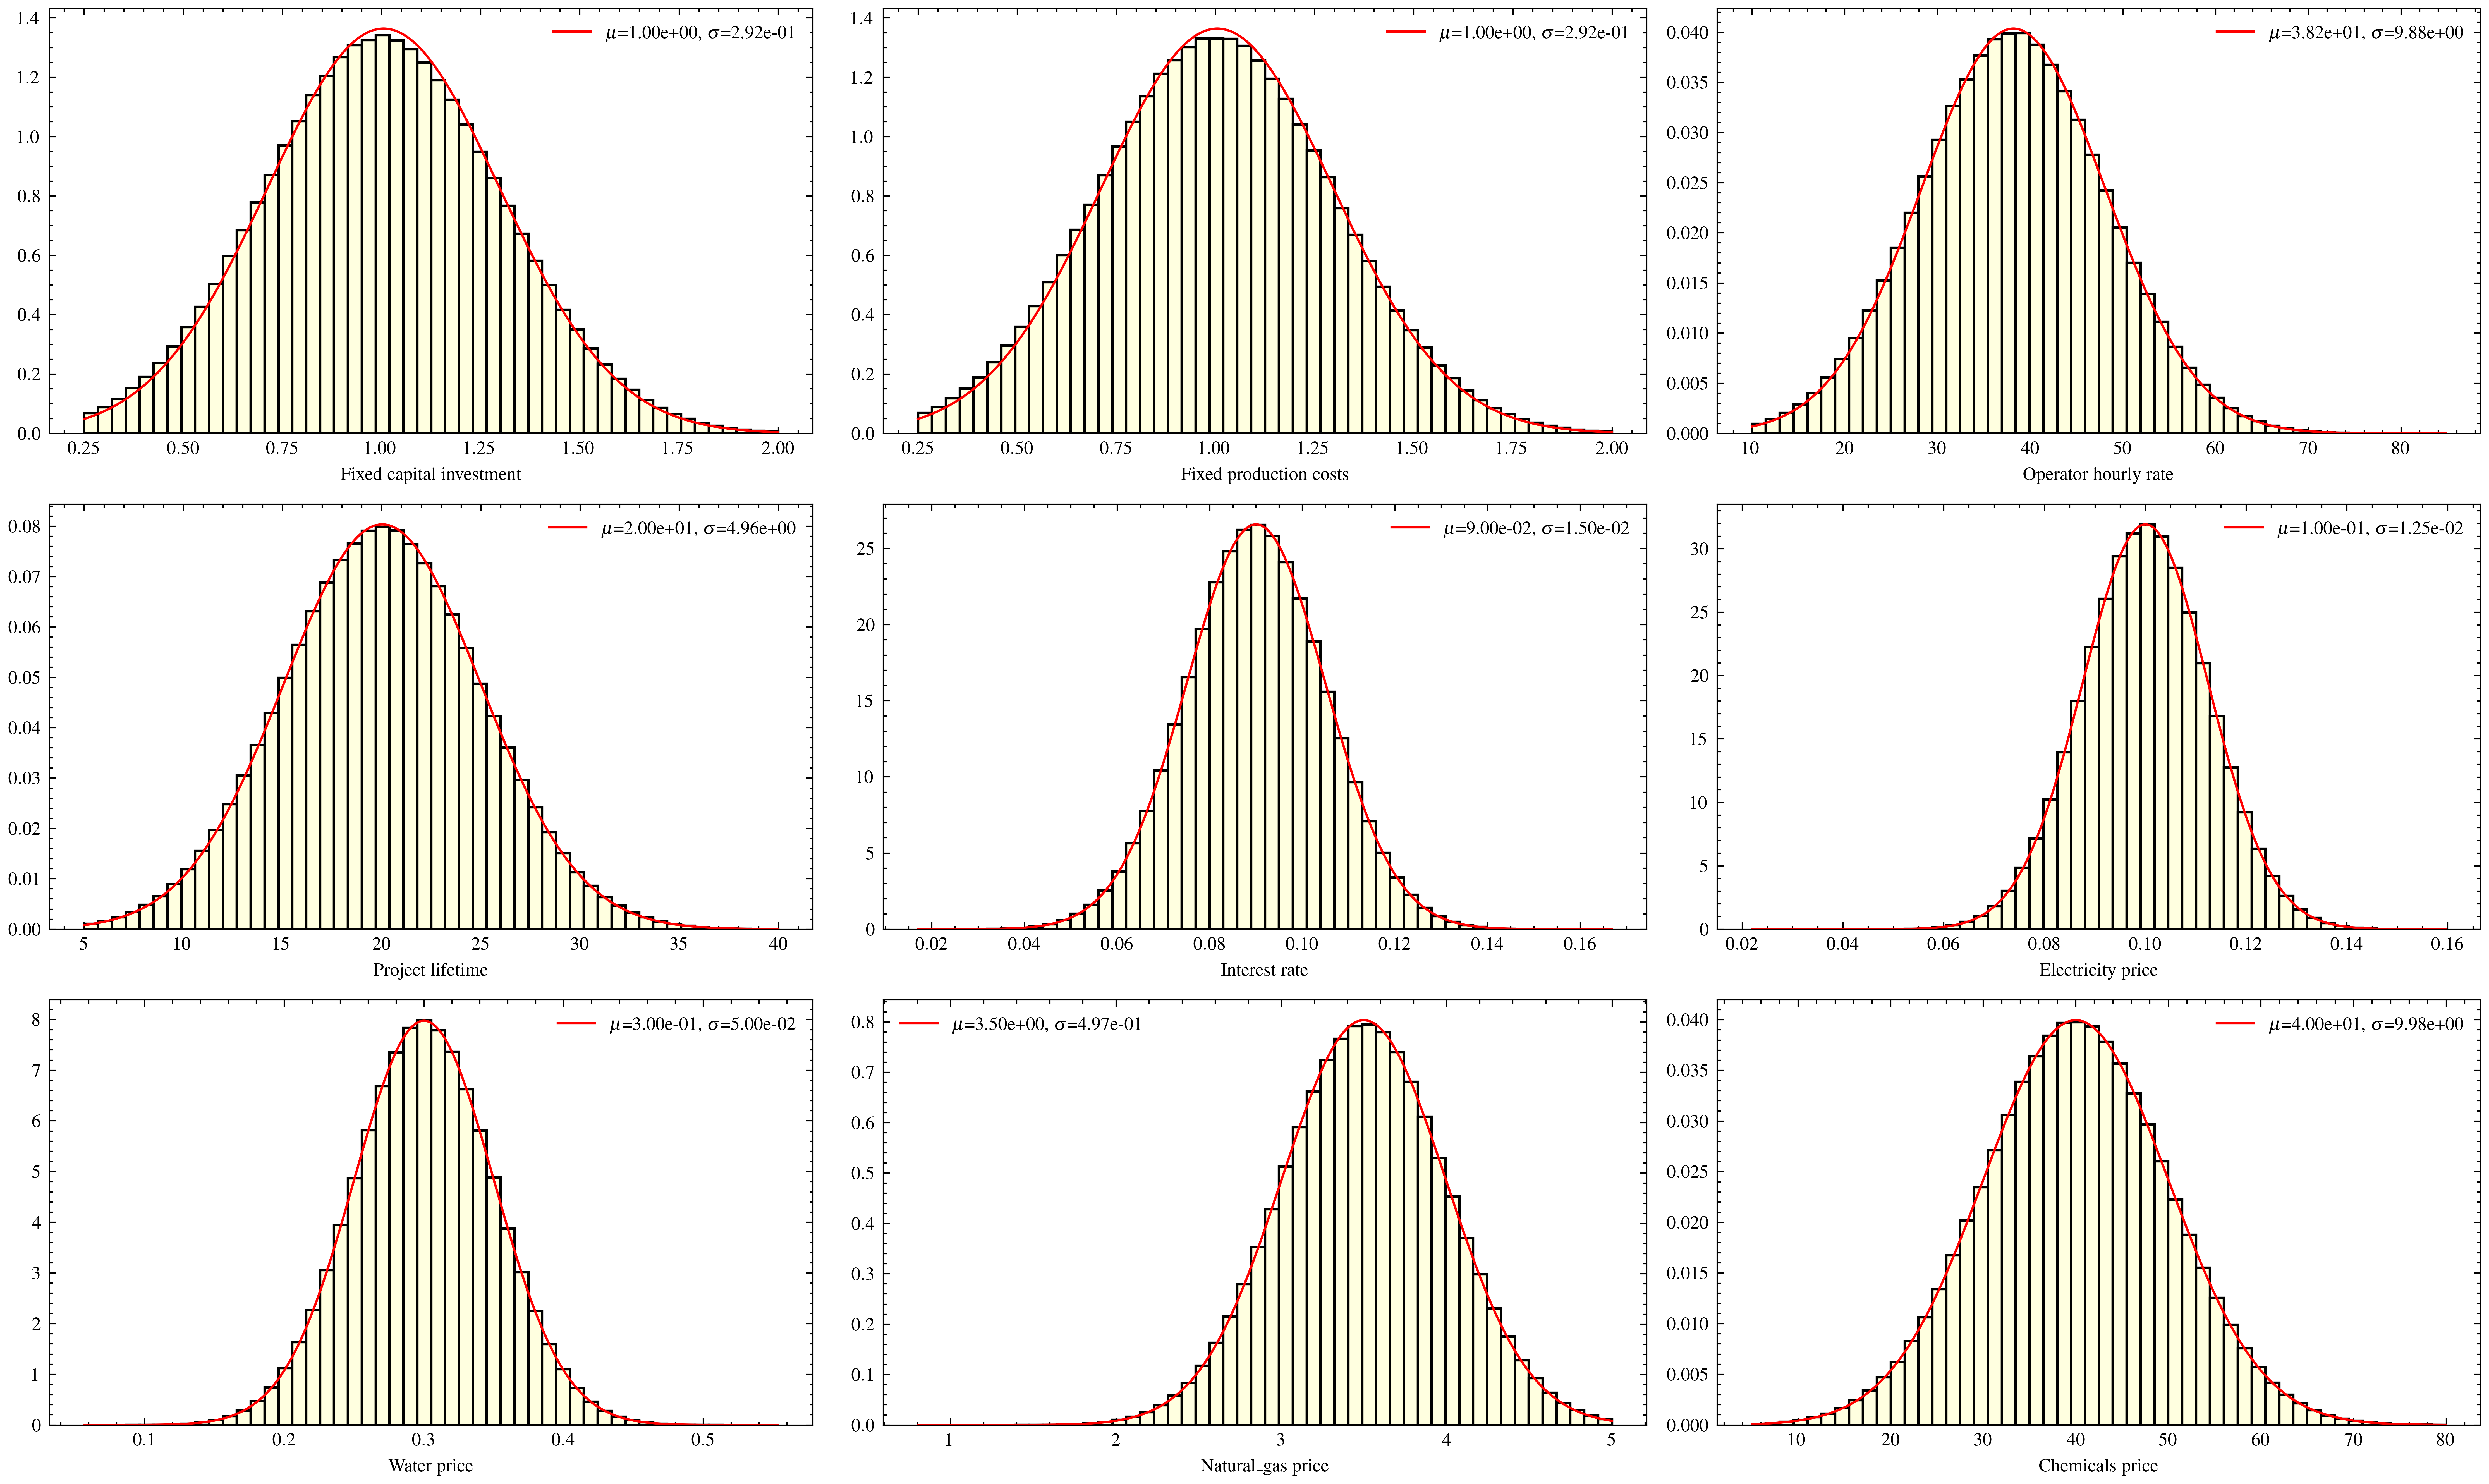

In [19]:
monte_carlo(process_plant=MyPlant, num_samples=2_000_000, batch_size=1000, show_input_distributions=True)

The first plot displays the resulting distribution of the LCOP based on 2,000,000 simulation samples. The narrow distribution (mean: 2.23 USD/kg, standard deviation: 8.22e-3) indicates that the LCOP is relatively stable under the assumed uncertainties, suggesting a robust economic performance for the given process configuration.

The second figure (set of plots) shows the input parameter distributions used in the Monte Carlo analysis. Each histogram represents the assumed variability in a specific economic or operational parameter, such as fixed capital, interest rate, or natural gas price. The red lines indicate the fitted normal distribution for each parameter.